In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#Import data and show first 5 rows of data
data=pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
data.head(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [2]:
#get data structure
data.info()
#Calculate the statistical values
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [3]:
#droping unwanted coloumns
df = data.drop(['Name','Year','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1)
df.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109 min,7.0,8
2,90 min,NaN,NaN
3,110 min,4.4,35
4,105 min,NaN,NaN


In [4]:
#Replacing string values
df['Duration']=df['Duration'].str.replace(' min', '')
df['Votes']=df['Votes'].str.replace(',', '')
df['Votes']=df['Votes'].replace('$5.16M', 5.16)

In [5]:
#checking nul values
df.isnull().sum()

Duration    8269
Rating      7590
Votes       7589
dtype: int64

In [6]:
df.dropna(subset=['Duration','Votes','Rating'], inplace=True) #droping null values

In [7]:
#checking nul values
df.isnull().sum()

Duration    0
Rating      0
Votes       0
dtype: int64

In [9]:
#Splitting the data into dependent y and independent x variables
x=df.drop(['Rating'], axis=1)
y=df['Rating']

In [11]:
#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=22)

In [12]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [13]:
linear.fit(x_train, y_train)

LinearRegression()

In [14]:
lin_pred=linear.predict(x_test)

In [15]:
#Check r square
print(r2_score(y_test, lin_pred))

0.028032979070219066


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)


In [17]:
gradient_boosting_model.fit(x_train, y_train)


GradientBoostingRegressor()

In [18]:
y_pred = gradient_boosting_model.predict(x_test)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.7685831758978434
R-squared: 0.0656164919272757


In [20]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=22)

In [21]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=22)

In [22]:
tree_pred=tree.predict(x_test)

In [23]:
print(r2_score(y_test, tree_pred))

-0.8458911965167992


In [24]:
data1=data.dropna()


C:\Users\USER\AppData\Local\Temp\ipykernel_15160\28951585.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Rating', data=data2_sorted, palette='viridis')


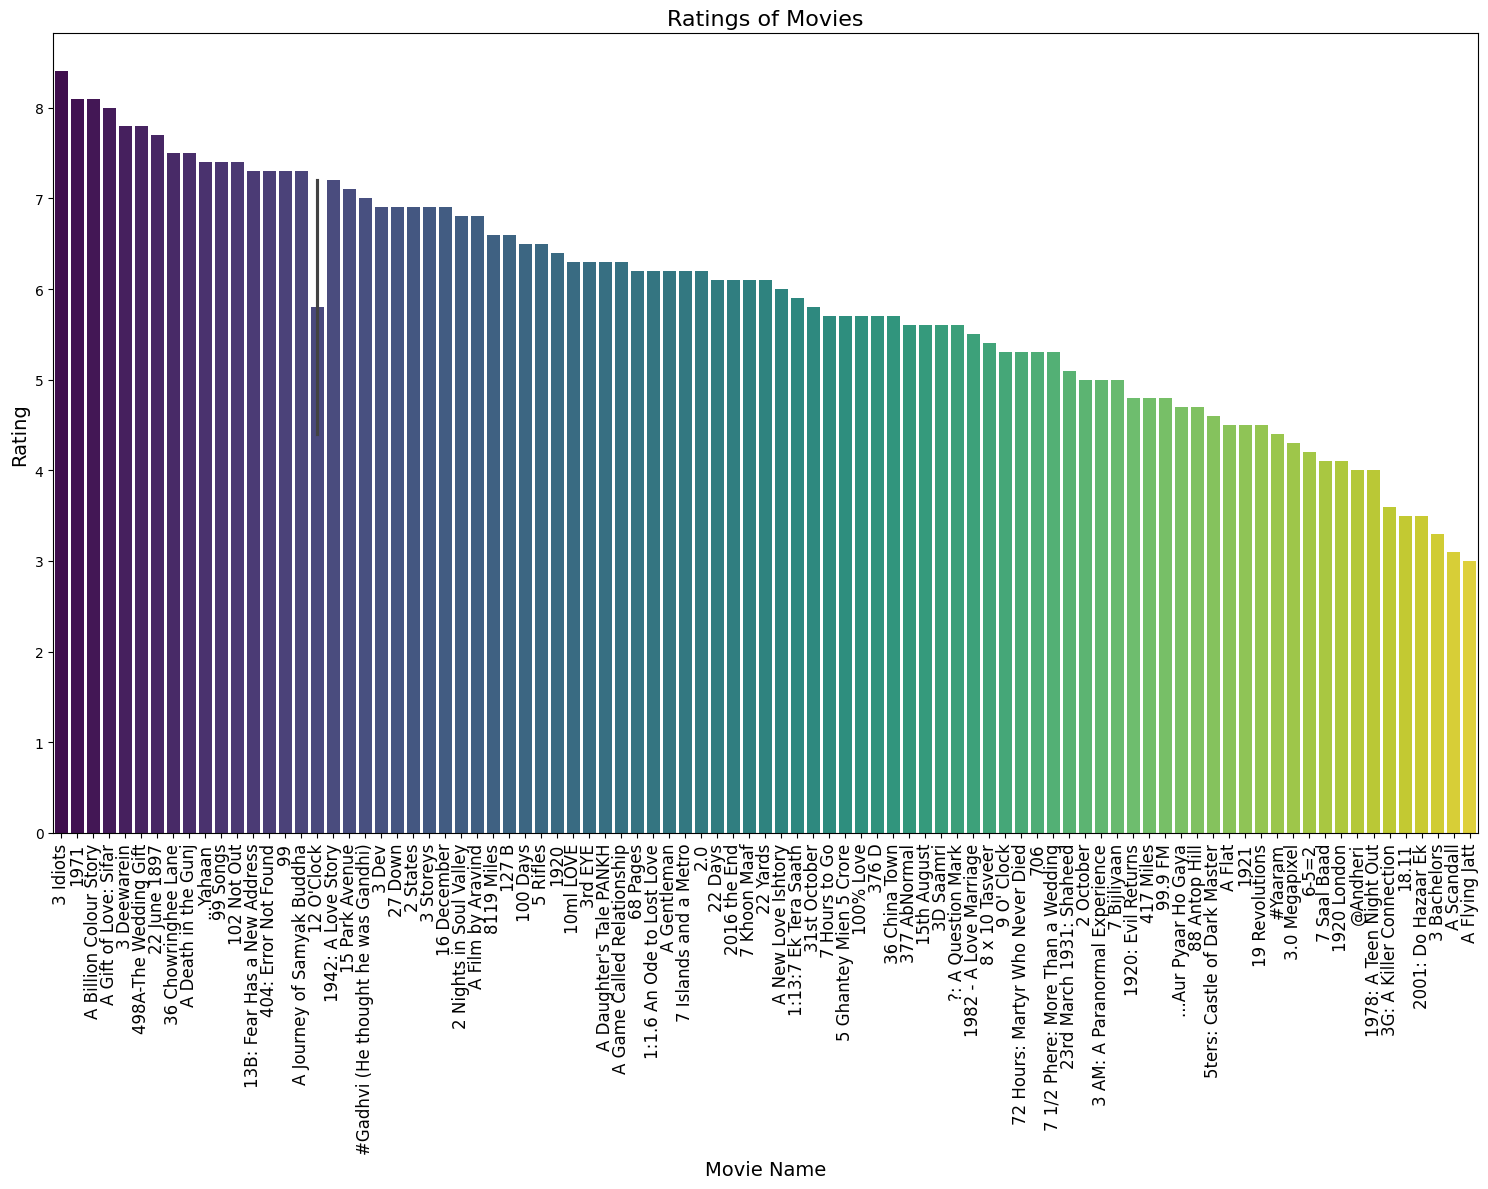

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 12))

# Sort the data by ratings
data2_sorted = data1.head(90).sort_values(by='Rating', ascending=False)

# Create a barplot for better comparison
sns.barplot(x='Name', y='Rating', data=data2_sorted, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Title and labels
plt.title('Ratings of Movies', fontsize=16)
plt.xlabel('Movie Name', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Show the plot
plt.tight_layout()  # To avoid label cutoff
plt.show()
